#Computer Vision and Object Detection 
Computer Vision API를 사용해서 이미지 속에 있는 사물을 인식하는 데모입니다.
네트워크 통신을 위해서 reqests 패키지를 import 합니다.

In [1]:
import requests 

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO 

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [4]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [16]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [17]:
analyze_url = vision_base_url + 'analyze'

In [18]:
image_url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202007/16/08de36da-fbff-492d-8806-211610773085.jpg'

In [19]:
response = requests.get(image_url)

In [20]:
image = Image.open(BytesIO(response.content))

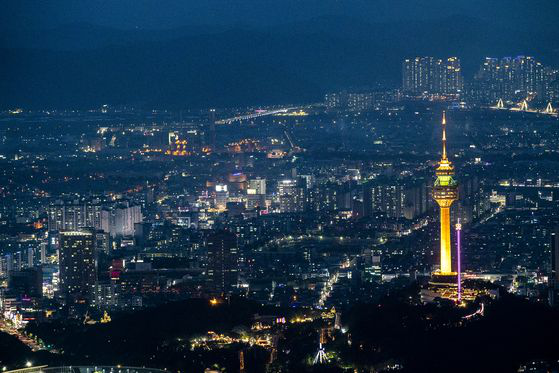

In [21]:
image

In [22]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [23]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)

In [24]:
analysis=response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [25]:
analysis

{'categories': [{'name': 'building_',
   'score': 0.234375,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_', 'score': 0.00390625, 'detail': {'landmarks': []}},
  {'name': 'outdoor_city', 'score': 0.484375, 'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Black',
  'dominantColorBackground': 'Black',
  'dominantColors': ['Black'],
  'accentColor': '143E61',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'city',
   'building',
   'water',
   'large',
   'view',
   'background',
   'boat',
   'mountain',
   'river',
   'seen',
   'clock',
   'tall',
   'body',
   'tower',
   'harbor',
   'traffic',
   'ocean',
   'night'],
  'captions': [{'text': 'a view of a large body of water with a city in the background',
    'confidence': 0.9421434930843939}]},
 'requestId': 'd1fcc2f1-e9a3-4947-b453-d1f2d57a9efa',
 'metadata': {'height': 373, 'width': 559, 'format': 'Jpeg'}}

In [27]:
analysis['description']['captions'][0]['text']

'a view of a large body of water with a city in the background'

# Object Detection

In [28]:
objectDetection_url=vision_base_url+'detect'

In [29]:
object_image ='https://www.newsmin.co.kr/news/wp-content/uploads/2021/05/05180000dddd-1-1536x904.jpg'

In [33]:
img = Image.open(BytesIO(requests.get(object_image).content))

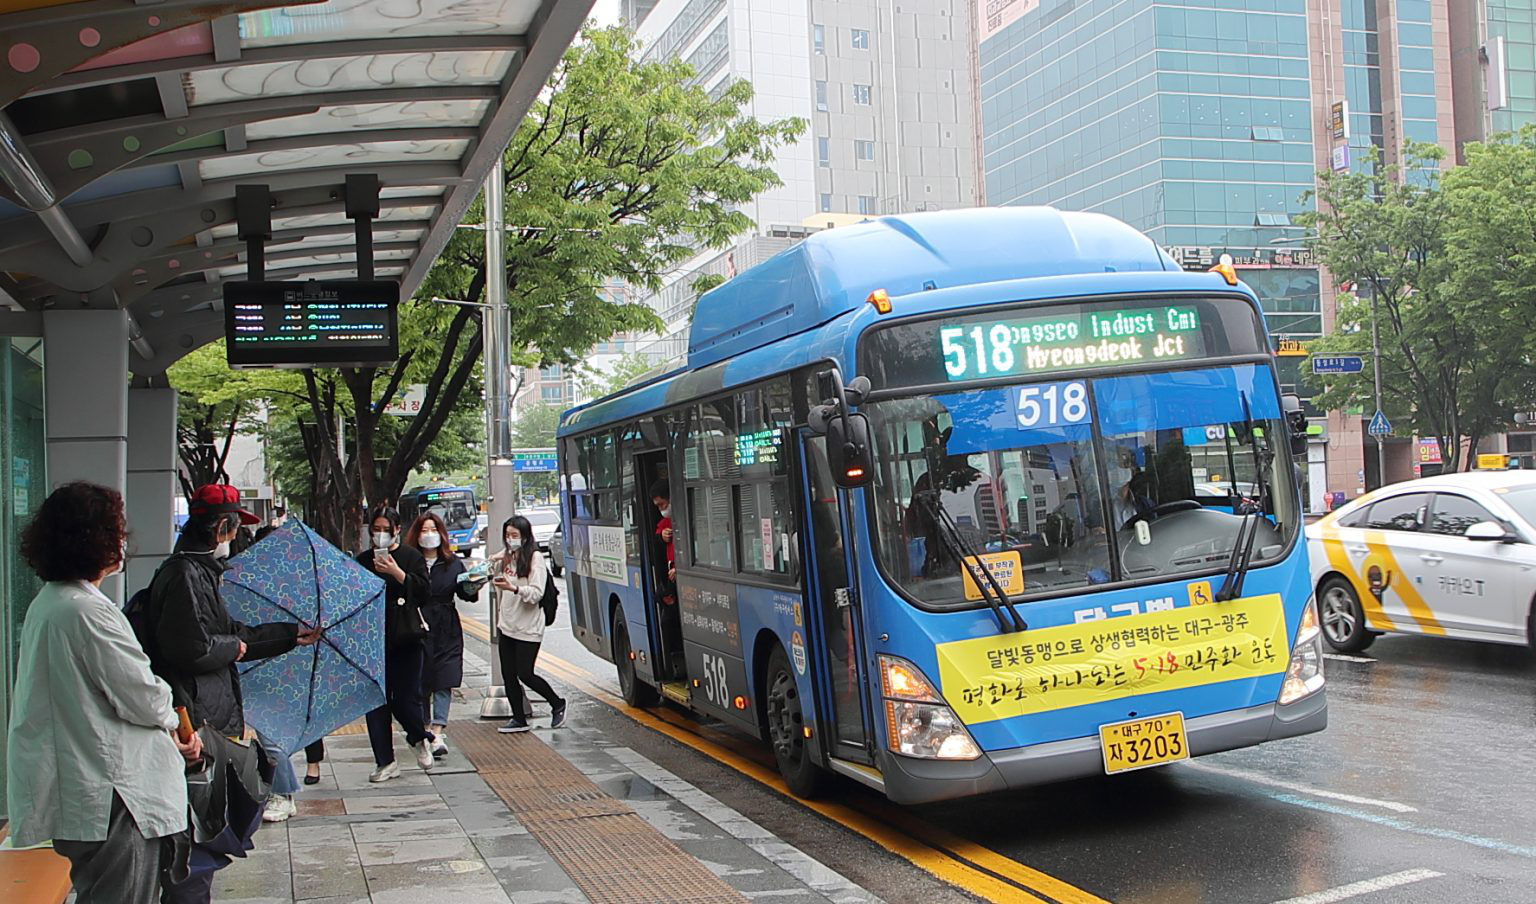

In [34]:
img

In [35]:
headers={'Ocp-Apim-Subscription-Key':subscription_key}
data={'url':object_image}

In [36]:
response = requests.post(objectDetection_url, headers=headers, json=data)

In [41]:
detectionResult=response.json()

In [43]:
detectionResult

{'objects': [{'rectangle': {'x': 1310, 'y': 474, 'w': 222, 'h': 193},
   'object': 'taxi',
   'confidence': 0.522,
   'parent': {'object': 'car',
    'confidence': 0.828,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.848,
     'parent': {'object': 'Vehicle', 'confidence': 0.849}}}},
  {'rectangle': {'x': 5, 'y': 483, 'w': 198, 'h': 421},
   'object': 'person',
   'confidence': 0.809},
  {'rectangle': {'x': 144, 'y': 490, 'w': 148, 'h': 393},
   'object': 'person',
   'confidence': 0.747},
  {'rectangle': {'x': 560, 'y': 219, 'w': 751, 'h': 590},
   'object': 'shuttle bus',
   'confidence': 0.918,
   'parent': {'object': 'bus',
    'confidence': 0.928,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.94,
     'parent': {'object': 'Vehicle', 'confidence': 0.94}}}}],
 'requestId': '058e4852-7c3a-4c5c-88ab-bb579ef77bc9',
 'metadata': {'height': 904, 'width': 1536, 'format': 'Jpeg'}}

In [44]:
from PIL import Image, ImageDraw,ImageFont

In [52]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']
for obj in objects:
    #print(obj)
    
    rect = obj['rectangle']
    
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    
    #사각형을 그리는 코드
    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    
    #글자를 입력하는 코드
    objectName = obj['object']
    draw.text((x,y),objectName, fill='red')

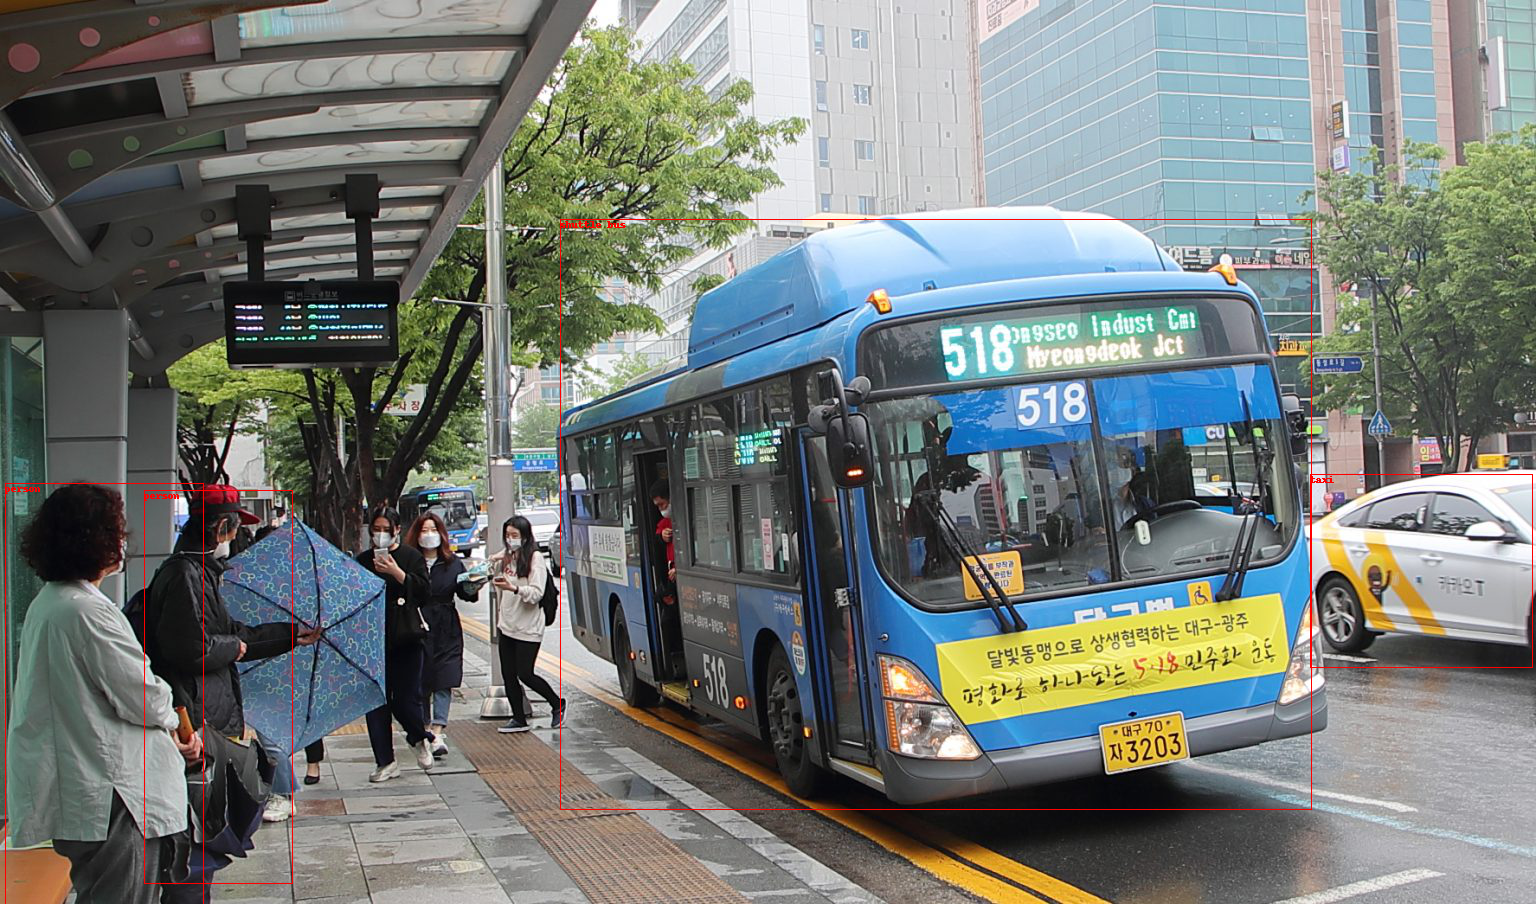

In [53]:
img